<a href="https://colab.research.google.com/github/ntavakoulnia/ntavakoulnia/blob/main/student_mle_miniproject_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [ ]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Download the dataset and load it into a pandas DataFrame
# Created the dataframe using read_csv, reading in the DATA_PATH .data file, header = None inorder to make sure the first line of the data set was not set as the header.
# Set the column labels as names to represent each column based on documentation from uci's adult data.
df=pd.read_csv(DATA_PATH, header=None, names=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education Number', 'Marital Status', 'Occupation','Relationship','Race','Sex','Capitial Gain','Capitial Loss','Hours Per Week','Native Country','Income'])
df

,Age,Workclass,Fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capitial Gain,Capitial Loss,Hours Per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Display the first few rows of the DataFrame
# The head function takes the first 5 rows of data from each column for df.
df.head()

,Age,Workclass,Fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capitial Gain,Capitial Loss,Hours Per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [ ]:
# Do some exploratory analysis. How many rows/columns are there?
# The shape function takes in the number of rows and columns.
df.shape
#Question: How many rows/columns are there?
#Answer: 32561 rows and 15 columns

(32561, 15)

In [ ]:
# How are NULL values represented?
# Answer:  I found that the ' ?' string seems to represent the NULL values.
# I created a for loop to go through each column name and print out all the unique values within each of the columns.
for x in df.columns:
  print(df[str(x)].unique())
# After seeing the unique values within each column, I found that the ' ?' string seems to represent the NULL values.
# So, I used the replace function for the dataframe df, to replace any instances within the dataframe from ' ?'  to NaN,
# setting the inplace=True, so that it updates the dataframe for this change.
df.replace(' ?',np.nan,inplace=True)
# I then checked again the unique values within each columns to make sure the update was properly executed.
for x in df.columns:
  print(df[str(x)].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[ 77516  83311 215646 ...  84661 257302 201490]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-fami

In [ ]:
# What's the percentrage of positive cases in the dataset?
# Answer:24.080955744602438
# By filtering the Income column for all the cases where ' >50K',
# which was written like this within the dataframe for all cases where the income was greater then 50,000.
# I took the count of all those instances divided by the count of all the instances of the income column.
# I then multipled by 100 to get the percentage value for all the postive cases in the dataset, which
# are all the incomes greater then 50,000.
(df['Income'][df['Income']==' >50K'].count()/df['Income'].count())*100

24.080955744602438

In [ ]:
# Find all NULL values and drop them
# The null values previously discussed where found by the all the values with a ' ?' string name.
# I replaced then with NaN using the replace function and np.nan. From there, I used the dropna
# function to drop all rows with NaN and updated the dataframe df using the inplace=True.
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Workclass,0
Fnlwgt,0
Education,0
Education Number,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
# Use Scikit-Learn's LabelEncoder to convert the income column with a data type
# string to a binary variable.
# Using the LabelEncoder and fit_transform to transform the values in the income column
# into 0 for <= 50000 and 1 for > 500000 known as binary variables.
df['Income']=LabelEncoder().fit_transform(df['Income'])
df

,Age,Workclass,Fnlwgt,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capitial Gain,Capitial Loss,Hours Per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [ ]:
# Split dataset into training and test set
# We want to drop the income column since that is what we want to predict calling it X.
X=df.drop(columns='Income')
# We keep only the values of the income column into y.
y=df['Income']
# We the split the data into training and test sets using the train_test_split.
# We place our X and y values in the train test split, where we have 20 percent test and 80 percent for training given by test_size.
# Setting the random seed to 42 so that the data doesnt always move around.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [ ]:
# Use Scikit-Learn's roc_auc_score to calculate the AUC score for a method that
# always predicts the majority class.
# Importing the DummyClassifier from sklearn, which is the baseline model I will be using.
from sklearn.dummy import DummyClassifier
# I set my model as DummyClassifier, with the 'most_frequent' strategy.
# The dummyclassier is not made to learn data, but uses some predefined rules.
# For my code I used the most_frequent strategy, because it takes in the most occuring
# instance within the y_train set. For example if most of the people make less then
# 50k then it will always predict them having made less then 50k even though
# it is not true at all for every individual case.
model=DummyClassifier(strategy='most_frequent')
# I then fit my model to learn from the X_train and y_train.
model.fit(X_train , y_train)
# Using the roc_auc_score, which measures the area under the ROC curve, I compare
# the test results of the income column, with the probabilities for the two classes
# 0 and 1. Using the model.predict_proba for the X_test and extracting the probabilites
# from all the 1 classes, I obtain a roc_auc_score of 0.5.
roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])
# This score is exactly what I expected since there is a 50 percent chance
# of getting a 0 or 1 (random).

0.5

Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [ ]:
# Use Scikit-Learn's ColumnTransformer to apply One Hot Encoding to the
# categorical variables in workclass, education, marital-status, occupation,
# relationship, 'race', sex, and native-country. #Also, apply MinMaxScaler to
# the remaining continuous features.
# Set the categorical_variables with all the str or obj types as a list given below.
categorical_variables=['Workclass','Education','Marital Status','Occupation','Relationship','Race','Sex','Native Country']
# I then create an empty list for the continuous_features, where I will append the numerical value columns.
continuous_features=[]
# From there, I used a for loop to extract all the column names from  X, which are all the columns we are not trying to predict
# So every column except Income.
for x in X.columns:
# From there I stated if that column name (x) is not in the categorical_variables list, then append them into the continuous_features list.
  if x not in categorical_variables:
    continuous_features.append(x)
# After obtaining my categorical_variables and continuous_features lists, I want to place them into a preporcessor, using a
# ColumnTransformer, which combines both categorical_variables and continuous_features columns into one array.
# Using OneHotEncoder() each value from the categorical_variables is place into a column, where a 0 or 1 is associated with each
# row if it occurs ore not. A 1 will occur and 0 will not creating a binary classification. For MinMaxScaler() each value in the
# continuous_features is also placed in a column, however a value is given between or including 0 and 1, for each unique value if
# it occurs in that row.
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_variables),('num', MinMaxScaler(), continuous_features)])
# We can then use fit_tranform on our preprocessor, which fits the dataset X, applying it to preprocessor for example the OneHotEncoder
# which converts the strings into categories of 0 and 1 for all the columns in X that are in categorical_variables and MinMaxScaler which
# indentifies the numerical values to a range of [0,1] for all the columns in X that are in continuous_features. Then tranforms it by applying
# the learned tranformations to the X dataset.
X_transformed = preprocessor.fit_transform(X)

['Age',
 'Fnlwgt',
 'Education Number',
 'Capitial Gain',
 'Capitial Loss',
 'Hours Per Week']

In [ ]:
# How many columns will the dataframe have after these columns transformations are applied?
#Using the X_transformed which is the new dataset after the ColumnTransformer, I used the
#shape function which gives the number of rows and columns and only took the column values
#by using [1] at the end of shape, which represents the second value for shape being the
#number of columns.
X_transformed.shape[1]
#There were 104 columns observed in the new dataset after the ColumnTransformer.

104

Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [ ]:
# Define the Keras model
#Using a Sequential model, which is a linear stack of layers.
model = Sequential()
#By adding a Dense to a model, it is used to illustrate that each neuron in the Dense layer
#being 64 is connected to each neuron in the previous layer (in this case being the input_layer).
#64 is the number of neurons in the hidden layer. input_dim is set to 104 since we have 104 columns
#that we are using as input features or input neurons. I used relu for activiation for every neuron that is
#calculated.
model.add(Dense(64, input_dim=104, activation='relu'))
#I then created another connected layer with only 1 neuron, representing the output layer.
#Since I am only looking at predicting the Income column, which is a binary classificiation I used an output layer of 1.
#If there was a case where I am predicting multiple columns in a dataset for instance or
#a multi-class classificiation the dense would be larger between on the number of classes.
#The activiation used is sigmoid which is mostly used for binary classification since it
#outputs values that are between 0 and 1. If the output is of the sigmoid is close to 1
#the model predicts 1, if it is close to 0 the model will predict 0.
model.add(Dense(1, activation='sigmoid'))
#Using the model.compile, I am able to configure the model for training using a loss, optimizer, and metric term.
#I set the loss term to binary_crossentropy, since I am dealing with a binary classification. The loss function
#tells us how well the models predictions match the actual values we are looking for.
#The optimizer that is used is adam to adjust the models weights inorder to minimize the loss. I also added
#an accuracy as metrics inorder to see how the model is doing. The accuracy is the number of correct predictions
#divided by total number of predictions. The bases of the compiler is that when the model is used for predicting
#a value, the loss function calculates how off the predictions are from the actual values. If the value of the loss function
#is not close to 0, the optimizer = 'adam' in this case, will adjust the weights of the model based on the error the model makes.
#and it will keep going until there is a loss close to 0 or the best model case.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Create a Keras classifier
#Using a KerasClassifier allows us to use our Keras model into the scikit learn pipline
#this allows us to use cross-validation, grid search, or hytperparameter tuning within
#scikit-learn.
# I placed my model into the KerasClassifier, where it set epochs=10, which represents
# the number of times I want my dataset to be passed into the model for training.
# I set the batch_size to 32, meaning that the model will take 32 rows from my
# training data, process them,compute the loss, and adjust the weights.
# Then after the 32 rows are processed, the weights are updated. Then another
# set of 32 rows are processed. The larger the batch_size the higher the accuracy
# , however smaller batch_sizes can be effective, but maybe less accurate.
# The verbose which is the output displayed during training, is 1, meaning
# that it shows the progress during the training.
kmodel = KerasClassifier(model, epochs=10, batch_size=32, verbose=1)

In [ ]:
# Create the scikit-learn pipeline
#Using a pipline to chain together the precrocessing set used to preprocess the object
#and numerical parameters, and then trains and applies the classificiation model in this
#case kmodel.
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', kmodel)])

In [ ]:
# Fit the pipeline on the training data
#We then train the pipeline  using our training data for X and y, using the fit function.
pipeline.fit(X_train,y_train)

Epoch 1/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7910 - loss: 0.4353
Epoch 2/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8380 - loss: 0.3476
Epoch 3/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8406 - loss: 0.3420
Epoch 4/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8437 - loss: 0.3319
Epoch 5/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8490 - loss: 0.3249
Epoch 6/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8491 - loss: 0.3199
Epoch 7/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8542 - loss: 0.3167
Epoch 8/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8510 - loss: 0.3204
Epoch 9/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8467 - loss: 0.3220
Epoch 10/10
755/755 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8604 - loss: 0.3028


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass', 'Education',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex',
                                                   'Native Country']),
                                                 ('num', MinMaxScaler(),
                                                  ['Age', 'Fnlwgt',
                                                   'Education Number',
                                                   'Capitial Gain',
                                                   'Capitial Loss',
                                                   'Hours Per Week'])])),
                ('classifier',
                 KerasClassifier(batch_size=32, epochs=10, model=<Sequential name=sequential_11, built=True>))])

In [ ]:
# Calculate the AUC score of your model on the test data.
# Does the model predict better than random?
# Using the roc_auc_score, which measures the area under the ROC curve, I compare
# the test results of the income column, with the probabilities for the two classes
# 0 and 1. Using the pipeline.predict_proba for the X_test and extracting the probabilites
# from all the 1 classes, I obtain a roc_auc_score of 0.90.
roc_auc_score(y_test,pipeline.predict_proba(X_test)[:, 1])
#The AUC score was much higher then the previous score using the dummyclassifier
#Being 0.90 means it was pretty accurate could be better, but it was definately
#better then 0.50 which means the model was pretty much guessing (random).

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9079115012649519

189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


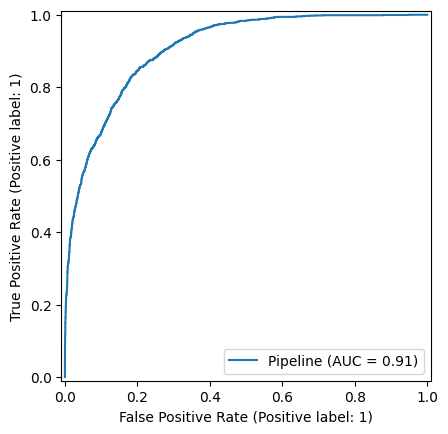

In [ ]:
# Generate an ROC curve for your model.
#Using the RocCurveDisplay to create the ROC curve, and the from_estimator, whichi
#generates the curve directly from the fitted model (pipelines), X_test are the data
#used for testing, adn y_test are the actual values or true values we were trying
#to predict.
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
#Looking at the ROC curve for the model, it seems like it does prerty good
#since there is a large area under the curve. However, it would be better
#if the left corner was closer to 1. The closer the left corner is to 1
#ther better the predicted results.